In [59]:
import pandas as pd 
import numpy as np 

data = pd.read_csv('Churn.csv')
print(data.head())

   RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...             1.0       101348.88      1
1          2    15647311      Hill  ...             1.0       112542.58      0
2          3    15619304      Onio  ...             0.0       113931.57      1
3          4    15701354      Boni  ...             0.0        93826.63      0
4          5    15737888  Mitchell  ...             1.0        79084.10      0

[5 rows x 14 columns]


In [60]:
data.describe()
# print(data.isnull())
data.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [61]:
#checking where is the missing value
missing_row = data[data.isnull().any(axis=1)]
print(missing_row)

   RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
4          5    15737888  Mitchell  ...             1.0        79084.10      0
6          7    15592531  Bartlett  ...             1.0        10062.80      0
8          9    15792365        He  ...             NaN        74940.50      0
9         10    15592389        H?  ...             1.0        71725.73      0

[4 rows x 14 columns]


In [62]:
data.info()
data = data.dropna()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [63]:
data['Exited'].value_counts()

Exited
0    7960
1    2038
Name: count, dtype: int64

Text(0.5, 1.0, 'Target Class Distribution')

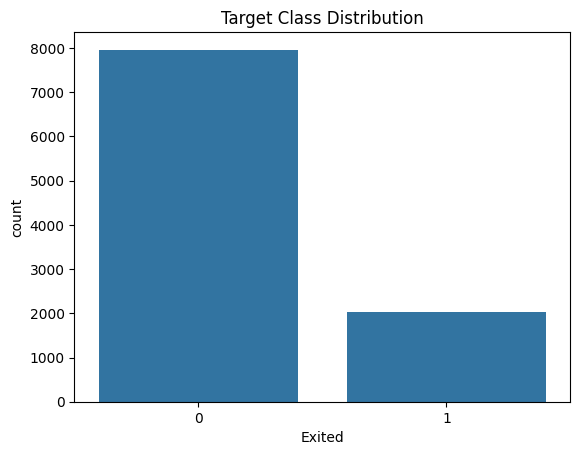

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Exited'].value_counts()
sns.countplot(x='Exited', data=data)
plt.title("Target Class Distribution")

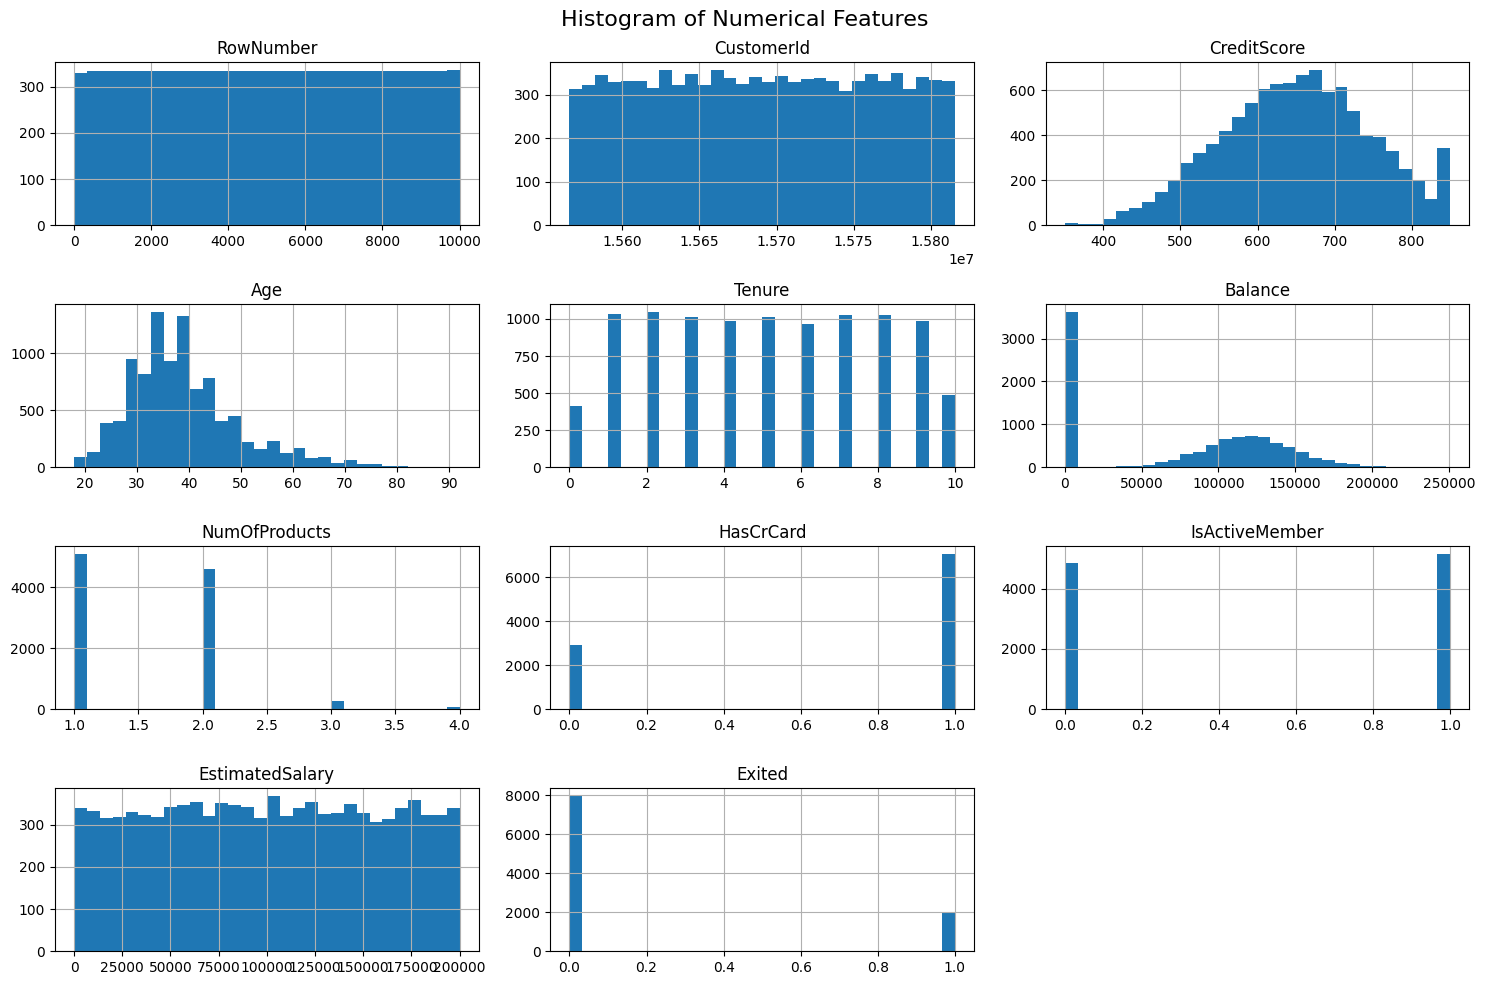

In [65]:
data.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

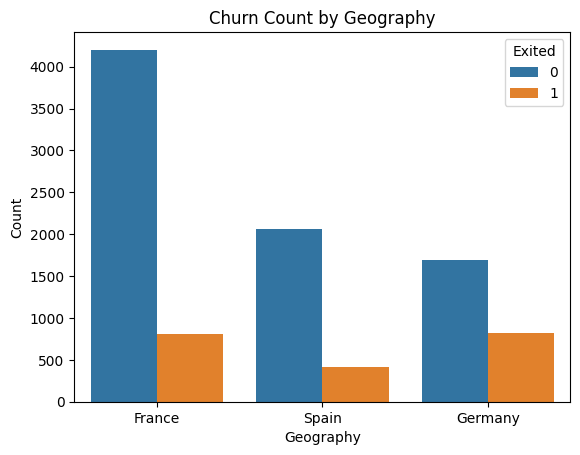

In [66]:
sns.countplot(x='Geography',hue = 'Exited', data=data)
plt.title("Churn Count by Geography")
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()


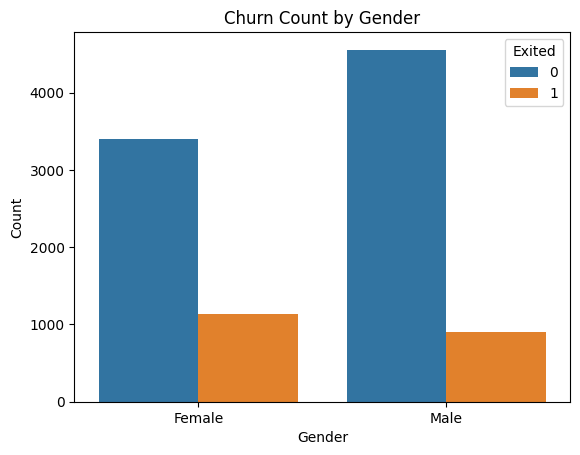

In [67]:
sns.countplot(x='Gender',hue='Exited',data= data)
plt.title("Churn Count by Gender")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

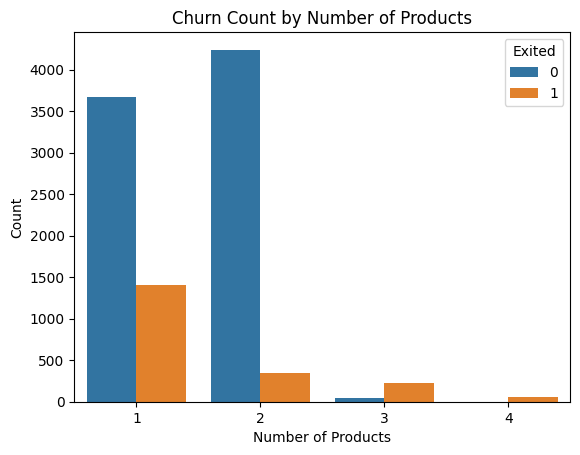

In [68]:
sns.countplot(x='NumOfProducts', hue='Exited',data = data)
plt.title("Churn Count by Number of Products")
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

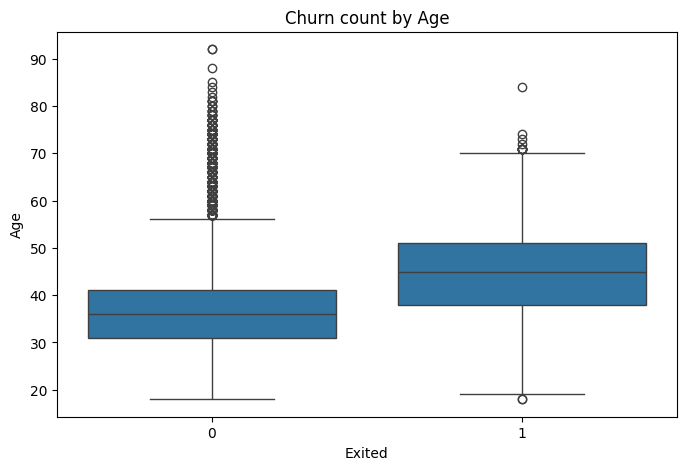

In [69]:
# sns.countplot(x='Age', hue ='Exited',data=data)
# plt.title("Churn count by Age")
# plt.xlabel('Age')
# plt.ylabel('Count')
# plt.show()


plt.figure(figsize=(8,5))
# sns.histplot(data['Age'], bins=30, kde=True)
sns.boxplot(x='Exited', y='Age', data=data)
plt.title("Churn count by Age")
plt.xlabel('Exited')
plt.ylabel('Age')
plt.show()



In [70]:
churn_data = data.copy()
churn_data = churn_data.drop(['RowNumber','CustomerId','Surname'],axis = 1)

churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [71]:
from sklearn.preprocessing import LabelEncoder

Label = LabelEncoder()
churn_data['Gender'] = Label.fit_transform(churn_data['Gender'])
churn_data['Geography'] = Label.fit_transform(churn_data['Geography'])
# data_encoded = pd.get_dummies(data_encoded, columns=['Geography'], drop_first=True)
churn_data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,2,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [72]:
from imblearn.over_sampling import SMOTE
X= churn_data.drop('Exited',axis  =1)
y = churn_data['Exited']

smote = SMOTE(random_state=42)
X_resample , y_resample = smote.fit_resample(X,y)

churn_data = pd.concat([pd.DataFrame(X_resample, columns=X.columns), pd.DataFrame(y_resample, columns=['Exited'])], axis=1)
# churn_data.head()
# churn_data.tail()
churn_data['Exited'].value_counts()

Exited
1    7960
0    7960
Name: count, dtype: int64

Corelation Matrix 

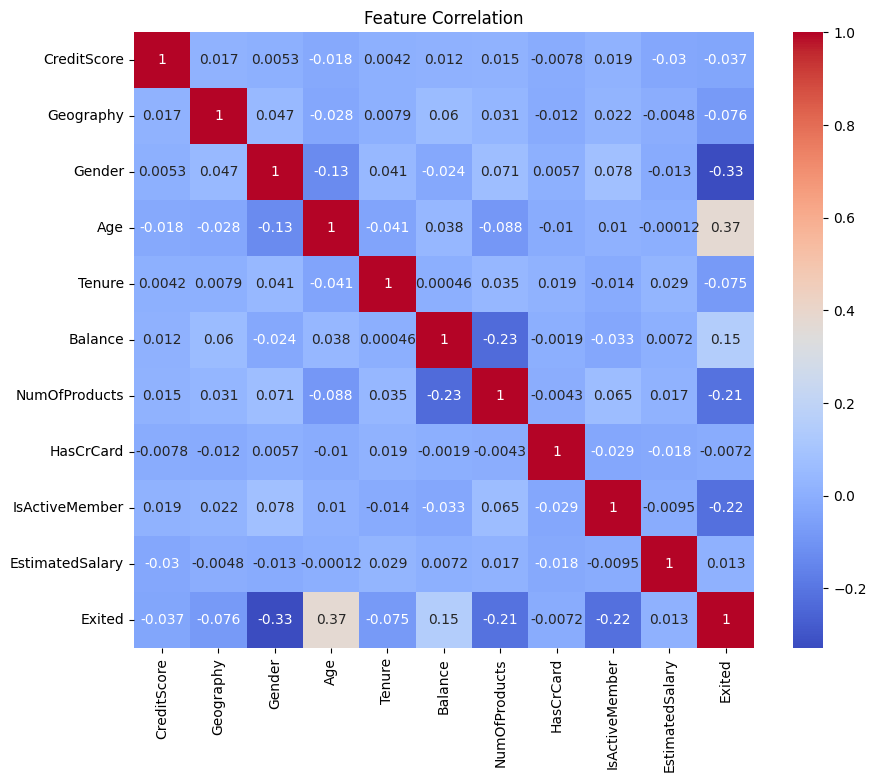

In [73]:
plt.figure(figsize=(10,8))
sns.heatmap(churn_data.corr(),annot=True,cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [74]:
def remove_outliers(df,columns):
    df_out = df.copy()
    for column in columns:
        print(column)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        df_out = df_out.loc[(df_out[column] >= lower_bound) & (df_out[column] <= upper_bound)]
    return df_out

columns_to_filter = ['Age','NumOfProducts','CreditScore']

df_filtered = remove_outliers(churn_data,columns_to_filter)


df_filtered

Age
NumOfProducts
CreditScore


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.000000,2,0.000000,1,1.000000,1.000000,101348.880000,1
1,608,2,0,41.000000,1,83807.860000,1,0.000000,1.000000,112542.580000,0
2,502,0,0,42.000000,8,159660.800000,3,1.000000,0.000000,113931.570000,1
3,699,0,0,39.000000,1,0.000000,2,0.000000,0.000000,93826.630000,0
4,645,2,1,44.000000,8,113755.780000,2,1.000000,0.000000,149756.710000,1
...,...,...,...,...,...,...,...,...,...,...,...
15915,475,0,0,44.951361,0,134272.513904,1,1.000000,0.000000,27854.653001,1
15916,700,1,1,62.266284,1,146011.748840,1,0.961383,1.000000,126759.588365,1
15917,807,0,0,47.973786,2,0.000000,1,0.128277,0.871723,192221.351850,1
15918,780,1,0,52.304335,0,133053.700340,1,1.000000,0.000000,22410.910262,1


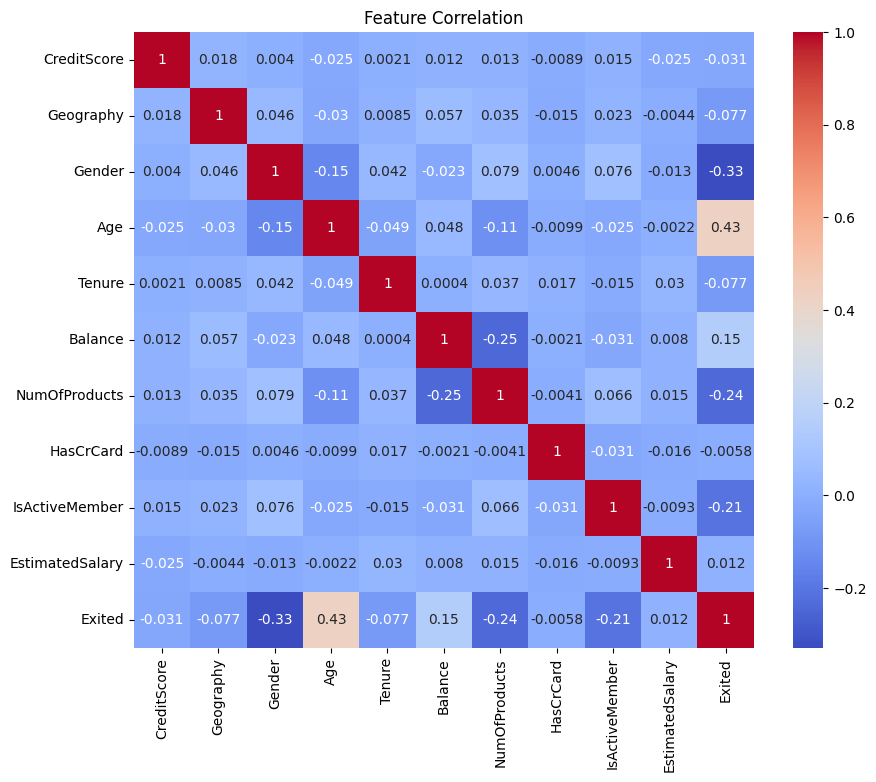

In [75]:
df_filtered

plt.figure(figsize=(10,8))
sns.heatmap(df_filtered.corr(),annot=True,cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [76]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['CreditScore','Balance','EstimatedSalary']

scalar = MinMaxScaler()

churn_data_scaled = churn_data.copy()
churn_data_scaled[columns_to_scale] = scalar.fit_transform(churn_data_scaled[columns_to_scale])

print(churn_data_scaled.head())

   CreditScore  Geography  Gender  ...  IsActiveMember  EstimatedSalary  Exited
0        0.538          0       0  ...             1.0         0.506735       1
1        0.516          2       0  ...             1.0         0.562709       0
2        0.304          0       0  ...             0.0         0.569654       1
3        0.698          0       0  ...             0.0         0.469120       0
4        0.590          2       1  ...             0.0         0.748797       1

[5 rows x 11 columns]


Decision Tree Classifier

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score



X = churn_data_scaled.drop('Exited',axis = 1)
y = churn_data_scaled['Exited']

X_train , X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

# dtc_classifier = DecisionTreeClassifier(random_state = 42)
dtc_classifier = DecisionTreeClassifier(random_state=42)
dtc_classifier.fit(X_train,y_train)
y_pred_dc = dtc_classifier.predict(X_test)

print("Classification Report :")
print(classification_report(y_test,y_pred_dc))
print("Accuracy score of Decision Tree Classifier: ", accuracy_score(y_test,y_pred_dc))

Classification Report :
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1623
           1       0.81      0.84      0.82      1561

    accuracy                           0.83      3184
   macro avg       0.83      0.83      0.83      3184
weighted avg       0.83      0.83      0.83      3184

Accuracy score of Decision Tree Classifier:  0.8250628140703518


Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


Rf_classifier = RandomForestClassifier()
Rf_classifier.fit(X_train,y_train)
y_pred_rc = Rf_classifier.predict(X_test)
print("Classification Report :")
print(classification_report(y_test,y_pred_rc))
print("Accuracy score of Random Forest  Classifier: ", accuracy_score(y_test,y_pred_rc))

Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1623
           1       0.90      0.85      0.88      1561

    accuracy                           0.88      3184
   macro avg       0.88      0.88      0.88      3184
weighted avg       0.88      0.88      0.88      3184

Accuracy score of Random Forest  Classifier:  0.8828517587939698


K Neighbors Classifier

In [79]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
y_pred_knc = knn_classifier.predict(X_test)
print("Classification Report :")
print(classification_report(y_test,y_pred_knc))
print("Accuracy score of KNeighbours Classifier: ", accuracy_score(y_test,y_pred_knc))

Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1623
           1       0.76      0.82      0.79      1561

    accuracy                           0.78      3184
   macro avg       0.79      0.78      0.78      3184
weighted avg       0.79      0.78      0.78      3184

Accuracy score of KNeighbours Classifier:  0.7836055276381909


HYPERTUNNING OF MODELS

Decision Tree Classifier

In [80]:
from sklearn.model_selection import GridSearchCV   

DTC = DecisionTreeClassifier()

param_grid_dt = {
    'criterion': ['gini','entropy'],
    'max_depth': [None,5,10,15],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

grid_search_dt = GridSearchCV(estimator=DTC,param_grid=param_grid_dt,cv=5,scoring='accuracy',n_jobs=-1)

grid_search_dt.fit(X_train,y_train)
print("Best Parameters for Decision Tree : ", grid_search_dt.best_params_)

Best Parameters for Decision Tree :  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [81]:
best_DTC_model = grid_search_dt.best_estimator_
y_pred_DTC = best_DTC_model.predict(X_test)

print("Classification Report :")
print(classification_report(y_test,y_pred_DTC))
print("Accuracy score of Decision Tree: ", accuracy_score(y_test,y_pred_DTC))

Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1623
           1       0.86      0.80      0.83      1561

    accuracy                           0.84      3184
   macro avg       0.84      0.84      0.84      3184
weighted avg       0.84      0.84      0.84      3184

Accuracy score of Decision Tree:  0.8401381909547738


Random Forest Classifier

In [82]:
rf = RandomForestClassifier()
param_grid_rf = {
    'n_estimators' : [50,100,150],
    'max_depth' : [None,10,20],
    'min_samples_split' :[2,5,10]
}
grid_search_rf = GridSearchCV(estimator=rf,param_grid=param_grid_rf,cv=5,scoring='accuracy',n_jobs=-1)

grid_search_rf.fit(X_train,y_train)
print("Best Parameters for Random Forest Classifier Tree : ", grid_search_rf.best_params_)


best_RF_model = grid_search_rf.best_estimator_
y_pred_RF = best_RF_model.predict(X_test)

print("Classification Report :")
print(classification_report(y_test,y_pred_RF))
print("Accuracy score of Random Forest Classifier: ", accuracy_score(y_test,y_pred_RF))

Best Parameters for Random Forest Classifier Tree :  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1623
           1       0.90      0.86      0.88      1561

    accuracy                           0.89      3184
   macro avg       0.89      0.88      0.88      3184
weighted avg       0.89      0.89      0.88      3184

Accuracy score of Random Forest Classifier:  0.8850502512562815


K Neighbors Classifier

In [83]:
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors' : [3,5,7,9],
    'weights' : ['uniform','distance']
}
grid_search_knn = GridSearchCV(estimator=knn,param_grid=param_grid_knn,cv=5,scoring='accuracy',n_jobs=-1)

grid_search_knn.fit(X_train,y_train)
print("Best Parameters for KNeighbours Classifier : ", grid_search_knn.best_params_)


best_KNN_model = grid_search_knn.best_estimator_
y_pred_KNN = best_KNN_model.predict(X_test)

print("Classification Report :")
print(classification_report(y_test,y_pred_KNN))
print("Accuracy score of K Neighbors Classifier: ", accuracy_score(y_test,y_pred_KNN))

Best Parameters for KNeighbours Classifier :  {'n_neighbors': 9, 'weights': 'distance'}
Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1623
           1       0.76      0.83      0.79      1561

    accuracy                           0.79      3184
   macro avg       0.79      0.79      0.79      3184
weighted avg       0.79      0.79      0.79      3184

Accuracy score of K Neighbors Classifier:  0.7864321608040201


LOGISTIC REGRESSION

In [85]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score



X = churn_data_scaled.drop('Exited',axis = 1)
y = churn_data_scaled['Exited']

X_train , X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)


logReg = LogisticRegression()
logReg.fit(X_train,y_train)
y_pred_log = logReg.predict(X_test)
print("Classification Report: ")
print(classification_report(y_pred_log,y_test))
print("Accuracy Score with Logistic regrestion : ", accuracy_score(y_pred_log,y_test)) 

Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.77      0.76      1558
           1       0.77      0.74      0.76      1626

    accuracy                           0.76      3184
   macro avg       0.76      0.76      0.76      3184
weighted avg       0.76      0.76      0.76      3184

Accuracy Score with Logistic regrestion :  0.7559673366834171


c:\MY R&A\Churn Prediction\churn_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
LR = LogisticRegression()
param_grid_LR = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_log = GridSearchCV(LogisticRegression(max_iter=1000,random_state=42),
                        param_grid=param_grid_LR, cv=5,scoring='accuracy' ,n_jobs=-1)
grid_log.fit(X_train,y_train)
print("Best parameters for logistic Regression : ",grid_log.best_params_)

y_pred_LR = grid_log.best_estimator_.predict(X_test)
print("Classification Report: ")
print(classification_report(y_pred_LR,y_test))
print("Accuracy Score with Logistic regrestion : ", accuracy_score(y_pred_LR,y_test)) 


Best parameters for logistic Regression :  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.77      0.76      1557
           1       0.77      0.74      0.76      1627

    accuracy                           0.76      3184
   macro avg       0.76      0.76      0.76      3184
weighted avg       0.76      0.76      0.76      3184

Accuracy Score with Logistic regrestion :  0.7562814070351759


In [87]:
from sklearn.metrics import confusion_matrix,r2_score

print("Before Hypertuning: ")
print("Accuracy score of Decision Tree Classifier: ", accuracy_score(y_test,y_pred_dc))
print("Accuracy score of Random Forest  Classifier: ", accuracy_score(y_test,y_pred_rc))
print("Accuracy score of KNeighbours Classifier: ", accuracy_score(y_test,y_pred_knc))
print("Accuracy score of Logistic Regression: ", accuracy_score(y_test,y_pred_log))



print("After Hypertuning :")
print("Accuracy score of Decision Tree: ", accuracy_score(y_test,y_pred_DTC))
print("Accuracy score of Random Forest Classifier: ", accuracy_score(y_test,y_pred_RF))
print("Accuracy score of K Neighbors Classifier: ", accuracy_score(y_test,y_pred_KNN))
print("Accuracy score of K Neighbors Classifier: ", accuracy_score(y_test,y_pred_LR))


Before Hypertuning: 
Accuracy score of Decision Tree Classifier:  0.8250628140703518
Accuracy score of Random Forest  Classifier:  0.8828517587939698
Accuracy score of KNeighbours Classifier:  0.7836055276381909
Accuracy score of Logistic Regression:  0.7559673366834171
After Hypertuning :
Accuracy score of Decision Tree:  0.8401381909547738
Accuracy score of Random Forest Classifier:  0.8850502512562815
Accuracy score of K Neighbors Classifier:  0.7864321608040201
Accuracy score of K Neighbors Classifier:  0.7562814070351759


CONFUSION MATRIX

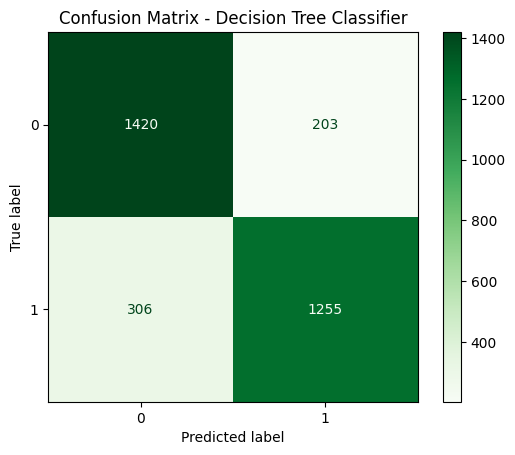

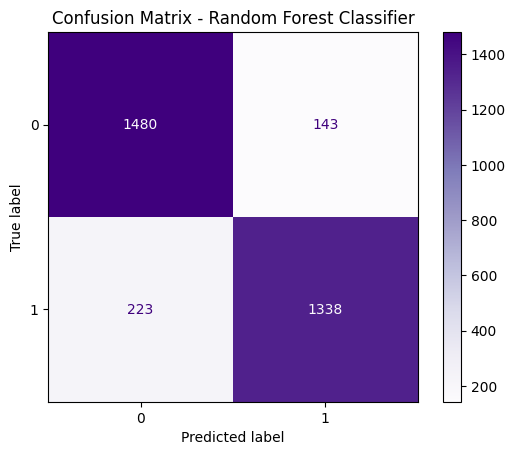

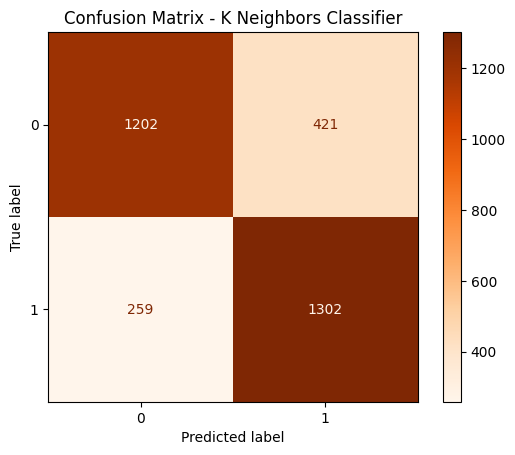

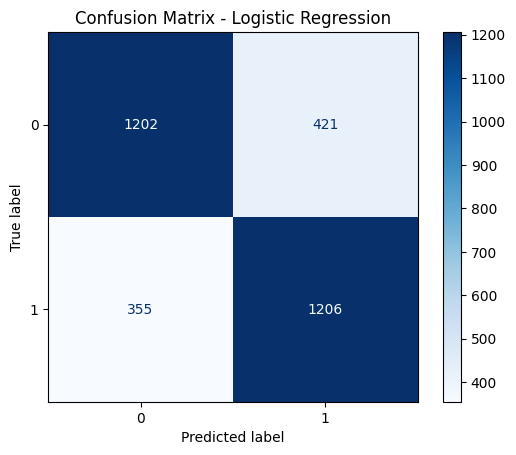

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, r2_score
import matplotlib.pyplot as plt

#Decision Tree
cm_dc = confusion_matrix(y_test,y_pred_DTC)
disp_dc = ConfusionMatrixDisplay(confusion_matrix= cm_dc,display_labels=[0,1] )
disp_dc.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()


# Random Forest
cm_rc = confusion_matrix(y_test,y_pred_RF)
disp_rc = ConfusionMatrixDisplay(confusion_matrix= cm_rc,display_labels=[0,1] )
disp_rc.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

#K Neighbors Classification
cm_knn = confusion_matrix(y_test,y_pred_KNN)

disp_knn = ConfusionMatrixDisplay(confusion_matrix= cm_knn,display_labels=[0,1] )
disp_knn.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix - K Neighbors Classifier")
plt.show()

cm_log = confusion_matrix(y_test, y_pred_LR)  

disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=[0, 1])  # 0: Not exited, 1: Exited
disp_log.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()



R-Square Score


In [93]:
print("R-square score of Decision Tree Classifier : ", r2_score(y_test,y_pred_DTC))
print("R-square score of Random Forest Classifier : ", r2_score(y_test,y_pred_RF))
print("R-square score of K Neighbors Classifier : ", r2_score(y_test,y_pred_KNN))
print("R-square score of Logistic Regression : ", r2_score(y_test,y_pred_LR))

R-square score of Decision Tree Classifier :  0.3603102108029873
R-square score of Random Forest Classifier :  0.5400265955872168
R-square score of K Neighbors Classifier :  0.14540460382324427
R-square score of Logistic Regression :  0.024755842010055318
